## Figure S8 - Displacement estimated from velocity v.s. the one reconstructed from time-series

In [8]:
%matplotlib inline
import os
from pprint import pprint
import numpy as np
from cartopy import crs as ccrs
from matplotlib import pyplot as plt
from mintpy.defaults.plot import *
from mintpy.utils import utils as ut, plot as pp, readfile
from mintpy import view

work_dir = os.path.expanduser('~/Papers/2021_Kirishima/figs_src/obs')
os.chdir(work_dir)
print('Go to directory', work_dir)

## Common setting
ref_lat, ref_lon = 31.916, 130.850

Go to directory /Users/yunjunz/Papers/2021_Kirishima/figs_src/obs


### Reconstruct displacement from time-series

In [5]:
proj_dir_base = os.path.expanduser('~/data/Kirishima')
proj_names = [
    'KirishimaAlosAT424',
    'KirishimaAlosDT73',
    'KirishimaAlos2AT131',
    'KirishimaAlos2DT23',
]
unw1_files = []
unw2_files = []
for proj_name in proj_names:
    vel_file = os.path.join(proj_dir_base, proj_name, 'mintpy/velocity.h5')
    atr = readfile.read_attribute(vel_file)    
    unw1_file = os.path.join(proj_dir_base, proj_name, 'mintpy/{}.unw'.format(atr['DATE12']))
    unw2_file = os.path.join(proj_dir_base, proj_name, 'mintpyAll/{}.unw'.format(atr['DATE12']))
    unw1_files.append(unw1_file)
    unw2_files.append(unw2_file)
pprint(unw1_files)
pprint(unw2_files)

['/Users/yunjunz/data/Kirishima/KirishimaAlosAT424/mintpy/20080929_20100705.unw',
 '/Users/yunjunz/data/Kirishima/KirishimaAlosDT73/mintpy/20081012_20100302.unw',
 '/Users/yunjunz/data/Kirishima/KirishimaAlos2AT131/mintpy/20150106_20171010.unw',
 '/Users/yunjunz/data/Kirishima/KirishimaAlos2DT23/mintpy/20150209_20170918.unw']
['/Users/yunjunz/data/Kirishima/KirishimaAlosAT424/mintpyAll/20080929_20100705.unw',
 '/Users/yunjunz/data/Kirishima/KirishimaAlosDT73/mintpyAll/20081012_20100302.unw',
 '/Users/yunjunz/data/Kirishima/KirishimaAlos2AT131/mintpyAll/20150106_20171010.unw',
 '/Users/yunjunz/data/Kirishima/KirishimaAlos2DT23/mintpyAll/20150209_20170918.unw']


save figure to file /Users/yunjunz/Papers/2021_Kirishima/figs_src/obs/extra4dis_map_est.png


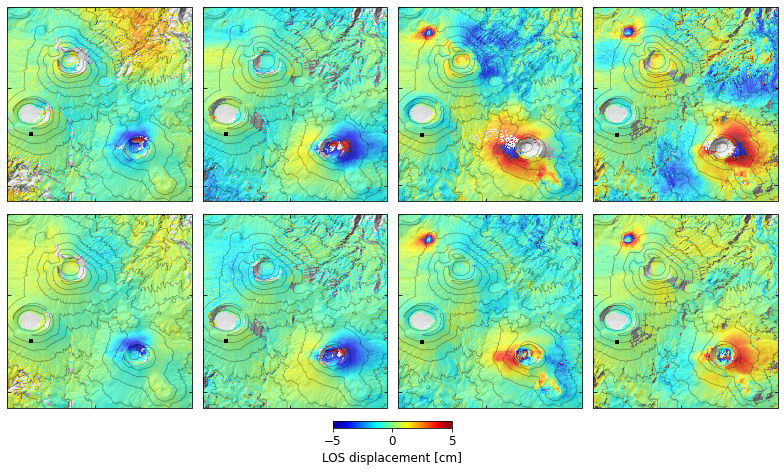

In [24]:
## Plot

# view.py options
dem_file  = os.path.expanduser('~/data/Kirishima/DEM/gsi10m.dem.wgs84')
opt = ' --sub-lat 31.895 31.955 --sub-lon 130.843 130.900 '
opt += '--dem {} --contour-step 100 --contour-smooth 0.0 '.format(dem_file)
opt += ' -c jet --wrap --wrap-range -5 5 -u cm '
opt += ' --notitle --fontsize 12 --ref-size 3 --lalo-step 0.03 --nocbar --noscalebar --alpha 0.7 '
opt += ' --noverbose --lalo-loc 0 0 0 0 '

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=[11, 6], subplot_kw=dict(projection=ccrs.PlateCarree()))
for i in range(len(unw1_files)):
    unw_files = [unw2_files[i], unw1_files[i]]
    for j in range(2):
        ax = axs[j, i]
        cmd = 'view.py {f} phase {o}'.format(f=unw_files[j], o=opt);
        data, atr, inps = view.prep_slice(cmd)
        ax, inps, im, cbar = view.plot_slice(ax, data, atr, inps)
#fig.subplots_adjust(hspace=0.01, wspace=0.05, left=0.05, right=0.95, top=0.95, bottom=0.05)
fig.tight_layout()

# colorbar
cax = fig.add_axes([0.425, -0.01, 0.15, 0.015])
cbar = plt.colorbar(im, cax=cax, orientation='horizontal')#, ticks=[-2.5, 0, 2.5])
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('LOS displacement [cm]', fontsize=font_size)

# output
out_file = os.path.abspath('extra4dis_map_est.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file', out_file)
plt.show()